# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Advertising.csv')
data.head(3)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [26]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [27]:
# Предикторы
X = np.array(data[['TV','radio','newspaper']])
# Целевая переменная
y = np.array(data['sales'])

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [28]:
#import numpy as np
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [29]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [30]:
y = y.reshape(-1, 1)

num_iters = 1000
# извлекаем размеры матрицы X
m, n = X.shape
w = np.zeros((n,1))  # Нулевой вектор весов
r = y - X.dot(w)          # Инициализация остатков

# Координатный спуск
for iteration in range(num_iters):
    for j in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:j] @ w[0:j]) + (X[:,j+1:] @ w[j+1:])
        # Обновляем остатки, удаляя вклад текущего веса w_j
        r = y - h
        # Обновляем новое значение k-ого коэффициента
        w[j] = (X[:,j].T @ (y - h))
        # Вычисляем функцию потерь
        cost = (sum((X @ w) - y) ** 2)/(len(y))

# Выводим вектор весов
print(w)

[[ 41.56217205]
 [110.13144155]
 [ 73.52860638]
 [ -0.55006384]]


In [31]:
#предлагаю для простоты дальнейших расчётов представить вектор весов так:
w = w.T[0]

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [32]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [33]:
#Возвращаем изначальную матрицу
X = np.array(data[['TV','radio','newspaper']])
y = np.array(data['sales'])

X = (X - X.mean(axis=0)) / X.std(axis=0)

print('Среднее масштабированного массива: %.0f'%(abs(X.mean())))
print('Стандартные отклонения масштабированного массива: %.0f'%(X.std()))

Среднее масштабированного массива: 0
Стандартные отклонения масштабированного массива: 1


**Добавим единичный столбец**

In [34]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [35]:
def mse_error(y, y_pred):
    """Функция вычисления среднеквадратичной ошибки

    Args:
        y (float): реальное значение
        y_pred (float): предсказанное значение
    Returns:
        result (float): значение MSE
    """
    mse = ((y - y_pred) ** 2).mean()
    return mse # Вычисляем среднее значение реальных продаж


mean_sales = np.mean(y)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [36]:
y_pred = np.full_like(y, mean_sales) 
# расчет MSE
mse = mse_error(y, y_pred)

print("Наивный прогноз (среднее значение продаж):", y_pred[0])
print("Среднеквадратичная ошибка (MSE) для наивного прогноза:", mse)

Наивный прогноз (среднее значение продаж): 14.0225
Среднеквадратичная ошибка (MSE) для наивного прогноза: 27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [37]:
def lin_pred(X, w):
    """Функция получит предсказания по весам линейной модели

    Args:
        X (array): матрица предикторов
        w (array): вектор весов линейной модели

    Returns:
        array: вектор прогнозов
    """
    y_pred = X@w
    return y_pred

In [38]:
# Мы произвели стандартизацию вектора Х, поэтому нам нужно обновить вектор весов w
# Обновим веса w для отмасштабированных данных
def lin_reg(X, y):
    a = np.dot(X.T, X)
    b = np.dot(X.T, y)
    return np.linalg.solve(a, b)


w = lin_reg(X, y).T

y_pred = lin_pred(X, w)
print(f'MSE: {mse_error(y, y_pred)}')

MSE: 2.7841263145109365


**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [39]:
def stoch_grad_step(X, y, w, index, eta=0.01):
    """summary

    Args:
        X (array): матрица предикторов
        y (array): вектор ответов
        w (array): вектор весов
        train_ind (int): индекс объекта
        eta (float): шаг градиентного спуска
    Returns:
        array: обновленный вектор весов
    """
    x_sample = X[index]
    y_sample = y[index]
    
    y_pred = x_sample @ w
    
    gradient = x_sample * (y_pred-y_sample) / len(X)
    weights = w - 2 * eta * gradient
    
    return weights

In [40]:
# Опять же желательно проверять работоспособность функций
stoch_grad_step(X, y, w, 11, 0.1)

array([14.02261487,  3.91934441,  2.79206845, -0.02267902])

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [48]:
def stochastic_gradient_descent(X, y, w, eta=0.1, max_iter=1e+4, dist_min=1e-8):
    """Функция реализующая стохастический градиентный спуск
    
    Args:
        X (array): матрица предикторов
        y (array): вектор ответов
        w (array): вектор весов
        eta (float): шаг градиентного спуска
        max_iter (type): максимальное количество итерации
        dist_min (type): минимальное расстояние между векторами весов
    """
    
    distance = 1e+10 #расстояние между векторами
    errors = [] #список для фиксации ошибок
    iters = 0

    w_value = []
    
    while distance > dist_min and iters < max_iter:
        random_ind = np.random.randint(X.shape[0])
        y_pred = lin_pred(X, w)
        
        errors.append(mse_error(y, y_pred))
        w_new = stoch_grad_step(X, y, w, random_ind, eta)
        
        distance = np.linalg.norm(w - w_new)
        w_value.append(w)
        
        w = w_new
        iters += 1
        
    return w, w_value, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

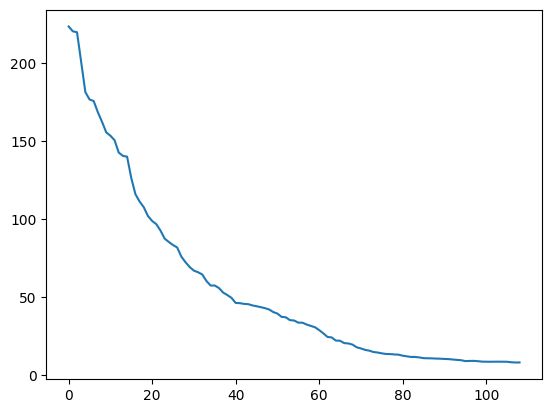

In [62]:
w, w_values, errors = stochastic_gradient_descent(X, y, np.zeros(X.shape[1]), 2, 1e+5, dist_min=1e-3)
plt.plot(errors)

**Выведите вектор весов, к которому сошелся метод.**

In [43]:
print(f'Вектор весов, к которому сошелся метод: {w}')

Вектор весов, к которому сошелся метод: [14.02030767  4.02930288  2.56319722 -0.06124374]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [44]:
mse_error(X@w, y)

2.8531495074587347

In [45]:
# Для поиска итерации на которой достигнут минимум целевой метрики используем Pandas
model_data = pd.DataFrame({'MSE': errors, 'w_value': w_values})
w_optimal = model_data.iloc[model_data['MSE'].idxmin()][1]

print(f'Минимальная целевая метрика достигнута на \
      {model_data["MSE"].idxmin()} итерации, и составила \
      {errors[model_data["MSE"].idxmin()]} \
      \nВеса линейной регрессии при этом составили {w_optimal}')

Минимальная целевая метрика достигнута на       207 итерации, и составила       2.7932639436798974       
Веса линейной регрессии при этом составили [13.97783471  3.94844051  2.75546278  0.06085254]


C:\Temp\ipykernel_16888\2623653776.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w_optimal = model_data.iloc[model_data['MSE'].idxmin()][1]


***
если проще - градиентный спуск с учётом предыдущего шага
***
Формально можно записать, что для того, чтобы попасть в следующую точку $x_1$, необходимо перейти из начальной точки $x_0$ на антиградиент, домноженный на некоторый коэффициент, который называется **шагом градиентного спуска** или **темпом обучения** — о нём мы поговорим немного позже.

$x_1 = x_0 - \alpha \nabla f (x_0)$

$\alpha$ - темп обучения

$\nabla f = \left ( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right )$ - вектор градиента:

In [46]:
# определим функцию
def fun(x, y, a=1, b=1):
    return a * (x**2) + b * (y**2)


# определим градиент
def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])


# простой градиентный спуск
def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
        
    return np.array(lst)

Градиентный спуск с `momentum`. Формально его можно определить следующим образом:

$x_{n+1}=x_n - \alpha\nabla f(x_n) + \gamma(x_n - x_{n-1})$

В формуле выше $\gamma$ — это параметр, который показывает, насколько учитывается предыдущий шаг.

Для примера найдём минимум функции $2x^2 - 4xy + y^4 + 2$ с помощью градиентного спуска.

In [47]:
def f(x, y): # сама функция далее не вызывается
    return 2*x**2-4*x*y + y**4 + 2 # но объявим её


def grad(x, y): # вычислятель градиента
    dx = 4*x-4*y # частная производная по х
    dy = 4*y**3-4*x # частная производная по у
    return (dx, dy)


x0 = (0, 1) # начальная точка
gamma = 0.02 # темп обучения
x_cur = x0 # текущая точка (на 1ой итерации совпадает с начальной)

vals = []
coords = []
i = 0

while True: # запускаем бесконечный цикл
    # метод градиентного спуска посчитанный покординатно
    x_new = (x_cur[0] - gamma * grad(*x_cur)[0],
            x_cur[1] - gamma * grad(*x_cur)[1]) 
    
    if i > 300: # зададим конечное количество итераций
        break
        
    x_cur = x_new # перезапишем текущую точку
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1 # добавим счётчик итераций

    # выведем интересующие нас значения
    print(f"iter={i}; x=({x_cur[0]:.4f}, {x_cur[1]:.4f});"\
          f" f(x)={f(*x_cur):.4f}; \
          grad f(x)=({grad(*x_cur)[0]:.4f}, {grad(*x_cur)[1]:.4f})") 

iter=1; x=(0.0800, 0.9200); f(x)=2.4348;           grad f(x)=(-3.3600, 2.7948)
iter=2; x=(0.1472, 0.8641); f(x)=2.0921;           grad f(x)=(-2.8676, 1.9920)
iter=3; x=(0.2046, 0.8243); f(x)=1.8709;           grad f(x)=(-2.4788, 1.4218)
iter=4; x=(0.2541, 0.7958); f(x)=1.7213;           grad f(x)=(-2.1668, 0.9996)
iter=5; x=(0.2975, 0.7758); f(x)=1.6161;           grad f(x)=(-1.9135, 0.6781)
iter=6; x=(0.3357, 0.7623); f(x)=1.5394;           grad f(x)=(-1.7062, 0.4288)
iter=7; x=(0.3699, 0.7537); f(x)=1.4812;           grad f(x)=(-1.5354, 0.2332)
iter=8; x=(0.4006, 0.7490); f(x)=1.4355;           grad f(x)=(-1.3939, 0.0787)
iter=9; x=(0.4284, 0.7475); f(x)=1.3983;           grad f(x)=(-1.2761, -0.0434)
iter=10; x=(0.4540, 0.7483); f(x)=1.3669;           grad f(x)=(-1.1775, -0.1396)
iter=11; x=(0.4775, 0.7511); f(x)=1.3397;           grad f(x)=(-1.0944, -0.2150)
iter=12; x=(0.4994, 0.7554); f(x)=1.3154;           grad f(x)=(-1.0241, -0.2733)
iter=13; x=(0.5199, 0.7609); f(x)=1.2935;    